- Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 Important

Tingues en compte que prèviament et caldrà preparar el dataset.



- Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.



- Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.



In [449]:
import pandas as pd
import numpy as np



from sklearn.preprocessing  import MinMaxScaler # queremos conservar outliers = varianza
from sklearn.decomposition import PCA


import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

facebook_df = pd.read_csv("Publicacions Facebook Thailandia (1).csv")
facebook_df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [450]:
facebook_df.dropna()
facebook_df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [451]:
# Vemos columnas vacías (0 non-null) y dtypes que no nos convienen(object. Haremos limpieza 

# Convert dtypes

new_df = facebook_df.convert_dtypes()



 # columnas Null

df = new_df.drop(['status_id','Column1','Column2','Column3','Column4'], axis = 1)



# convertimos la columna status_published  a un formato datetime

df['status_published'] = pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       7050 non-null   string        
 1   status_published  7050 non-null   datetime64[ns]
 2   num_reactions     7050 non-null   Int64         
 3   num_comments      7050 non-null   Int64         
 4   num_shares        7050 non-null   Int64         
 5   num_likes         7050 non-null   Int64         
 6   num_loves         7050 non-null   Int64         
 7   num_wows          7050 non-null   Int64         
 8   num_hahas         7050 non-null   Int64         
 9   num_sads          7050 non-null   Int64         
 10  num_angrys        7050 non-null   Int64         
dtypes: Int64(9), datetime64[ns](1), string(1)
memory usage: 667.9 KB


In [452]:
# Creamos Dummies para la columna  'status_type' : Video/ Photo.....dtype = int64


z = pd.get_dummies(df['status_type'], prefix=None, prefix_sep='_', dummy_na=False, columns=False, sparse=False, drop_first=False, dtype='int64')

In [453]:
# panda concat una vez tenemos los dummies para Video, photo


df_def = pd.concat([df, z], axis = 1)


# Drop de la columna status_published ( formato Datetime, nos está complicando las cosas)
# Drop de la columna que acabamos de obtener Dummies (status_type) y de las dos columnas que nos ha añadido al crear los Dummies : status, link : 

df2 = df_def.drop(['status_published','status_type','status','link'], axis = 1)



# !!!




# pensándolo bien , Video/ Photo tiene una varianza mínima, no nos aportan información. No era necesario tanto Dummie..Los eliminamos tb

df1 = df2.drop(['video','photo'], axis = 1)


# Se entiende que el objetivo es una maxima difusión/ viralización, así que nos interesa encontrar clusters en alguna de las columnas sobre interacción... 
df1


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


# PCA

In [454]:
names = df1.columns
names

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [455]:
#Aplicamos una standarización previa : 
# Aplicaremos MinMaxScaler porque queremos conservar los outliers..la varianza es información así como el orden es libertad


Scaled_df = MinMaxScaler().fit_transform(df1) 
df_scaled = pd.DataFrame(Scaled_df, columns = names)
df_scaled.describe()  

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Vamos a buscar el nº de dimensiones que optimizan la extracción de Varianza con el mínimo numero de características del dataset 

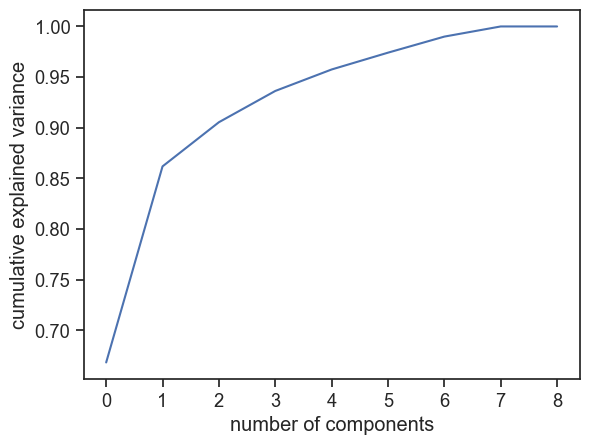

In [456]:
#Iniciamos PCA con todas las features
pca = PCA(n_components = df_scaled.shape[1], random_state = 42)

#Ajustamos a df_scaled
pca.fit(df_scaled)

# Medimos ajuste modelo
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot
plt.plot(cumulative_explained_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

 Segun el gráfico, con 4 components abarcaríamos más del 95% de la varianza ( info) del dataset .
 Vamos a verificar esta apreciación visual "aplicar" esta info.


In [457]:
# seleccionamos la varianza que quemos conservar

desired_explained_variance4 = 0.95

#buscamos cuantos componentes bastarían para alcanzar esta varianza
num_components4 = np.argmax(cumulative_explained_variance >= desired_explained_variance4)


# Ajustamos Pca a este numero óptimo de components 
pca4 = PCA(n_components = num_components4, random_state = 42)
pca4_scores  = pca4.fit_transform(df_scaled)

# y pasamos a DFrame

pca4_df = pd.DataFrame(pca4.components_, columns = names,  index = ['PC1','PC2','PC3','PC4'])
pca4_df.T


,PC1,PC2,PC3,PC4
num_reactions,0.705430,-0.085486,-0.015709,0.005398
num_comments,0.060744,0.382577,0.777761,-0.260384
num_shares,0.085442,0.436448,0.069508,-0.129298
num_likes,0.677741,-0.205174,0.057488,-0.015774
num_loves,0.158363,0.723987,-0.356354,0.011995
num_wows,0.066924,0.187978,-0.414432,0.122855
num_hahas,0.037633,0.169306,-0.058395,0.043317
num_sads,0.020930,0.109999,0.289242,0.943449
num_angrys,0.025164,0.116130,-0.029861,0.089409


 Son muchas pca...reduciremos desired_explained_variance a 90% a ver cuantos  PCA salen


In [458]:
# seleccionamos de nuevo la varianza que quemos conservar, esta vez reducimos a 0.90 en lugar de 0.95

desired_explained_variance2 = 0.90


#buscamos cuantos componentes bastarían para alcanzar esta varianza
num_components2 = np.argmax(cumulative_explained_variance >= desired_explained_variance2)


# Ajustamos Pca a este numero óptimo de components 
pca2 = PCA(n_components = num_components2)
pca2_scores = pca2.fit_transform(df_scaled)

# y pasamos a DFrame

pca2_df = pd.DataFrame(pca2.components_,columns = names, index = ['PC1','PC2'])
pca2_df


# Efectivamente, si reducimos la varianza a conservar, nos basta con 2 PCA´s para clusterizar el modelo 


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
PC1,0.705430,0.060744,0.085442,0.677741,0.158363,0.066924,0.037633,0.020930,0.025164
PC2,-0.085486,0.382577,0.436448,-0.205174,0.723987,0.187978,0.169306,0.109999,0.116130


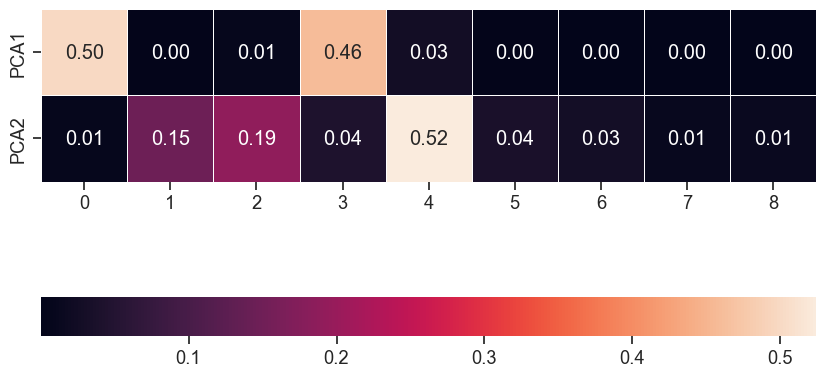

In [353]:

# Feature Weights ( con 2 componentes como nos sugiere el gráfico previo n components)
col = df_scaled.columns 
plt.figure(figsize = (10,10))

_ = sns.heatmap(pca2.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca2.n_components_+1)],
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.5,
                 cbar_kws={"orientation": "horizontal"})

Interpretacion del heatmap 90% Varianza = 2 PCA : 

Los principal components PCA1,PCA2  explican gran parte de la varianza (90%) del modelo .

PCA1 : Las columnas 0 ( num_reactions, PCA1 : 50% ) y 3 ( num_likes, PCA1 : 46%)  explican el modelo conservando el 90% de la varianza.
50+46 = 96 %  de la Varianza del modelo

PCA2 : Columna 4 (num_loves, PCA2 : 52%) y las columnas 1 (num_comments, PCA2 : 15%) y columna 2 (num_shares, PCA2 : 19%) = 52+15+19 = 86%  de la Varianza del modelo


Seguramente serían suficientes para crear un modelo a cclusterizar más ligero pero que mantuviese gran parte de la información. 




    

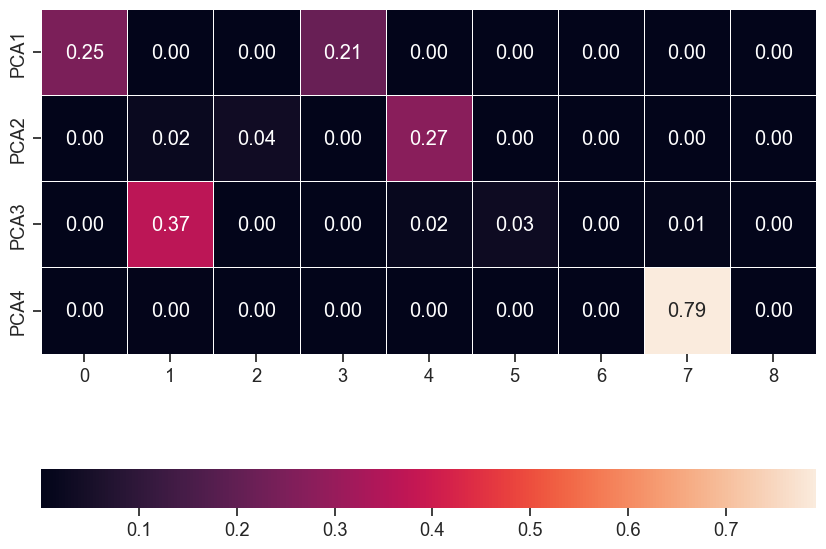

In [459]:
# Feature Weights ( con 4 componentes si lo que queremos es conservar el 95% de la varianza)

plt.figure(figsize = (10,10))

_ = sns.heatmap(pca4.components_**4,
                 yticklabels=["PCA"+str(x) for x in range(1,pca4.n_components_+1)],
                 
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.5,
                 cbar_kws={"orientation": "horizontal"})

Interpretacion del heatmap 95% Varianza = 4 PCA : 

Los principal components PCA1, PCA2, PC3 y PCA4  explican gran parte de la varianza (95%) del modelo .



       
 PCA1 : columna 0 (num_reactions : 25% varianza del modelo) y columna 3 (num_likes : 21% varianza del modelo)\
 PCA2 : columna 4 ( num_loves: 27% varianza del modelo)\
 PCA3 : columna 1 (num_comments : 60% varianza del modelo )\
 PCA4 : columna 7 : (num_sads : 79% )

In [460]:
# Para 4 PCA ( 0.95 % varianza ) 

pca4_component_df = pd.DataFrame(pca4.components_, columns = df_scaled.columns)
pca4_component_df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.705430,0.060744,0.085442,0.677741,0.158363,0.066924,0.037633,0.020930,0.025164
1,-0.085486,0.382577,0.436448,-0.205174,0.723987,0.187978,0.169306,0.109999,0.116130
2,-0.015709,0.777761,0.069508,0.057488,-0.356354,-0.414432,-0.058395,0.289242,-0.029861
3,0.005398,-0.260384,-0.129298,-0.015774,0.011995,0.122855,0.043317,0.943449,0.089409


In [461]:
# para 2 PCA( 0.90 % varianza ) 

pca2_component_df = pd.DataFrame(pca2.components_, columns = df_scaled.columns)
pca2_component_df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.705430,0.060744,0.085442,0.677741,0.158363,0.066924,0.037633,0.020930,0.025164
1,-0.085486,0.382577,0.436448,-0.205174,0.723987,0.187978,0.169306,0.109999,0.116130


<Axes: >

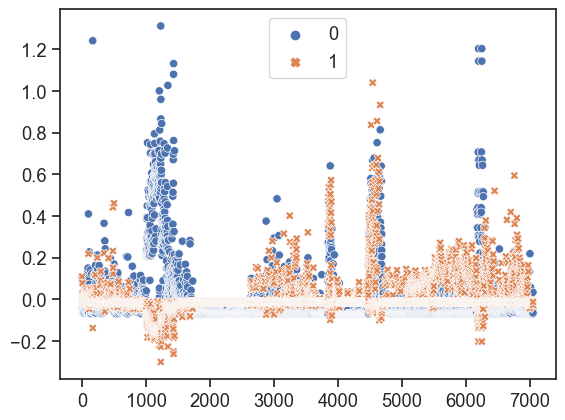

In [462]:
sns.scatterplot(pca2_scores)      # 2 PCAs  

# PC1 : num_reactions: 50%; num_likes : 46%
# PC2 : num_loves: 52%



Interpretación :

Vemos a priori 4 grupos : 

1. Cerca 1200 reactions
2.  Cerca de 3800 reactions
3. Cerca de 4800 reactions 
4. Cerca de 6200 reactions 


Vemos algunos grupos con muchas reacciones y  PC2 ( Love ) y algunos grupos ( circa 1000) donde no hay tantos Love

<Axes: >

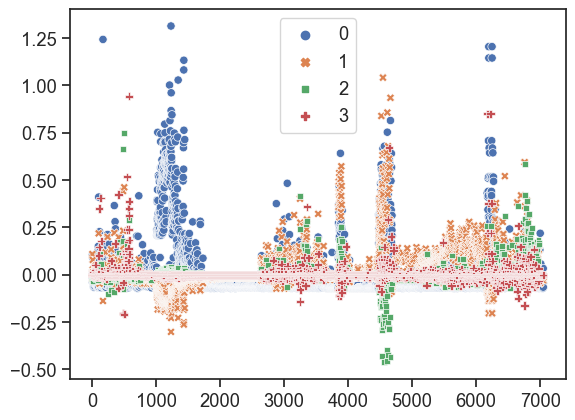

In [463]:
sns.scatterplot(pca4_scores)    # 4 PCAs  

# PC1 : num_reactions: 25%; num_likes : 21% de la varianza del modelo
# PC2 : num_loves: 27%
# PC3 : num_comments: 37%
# PC4 : num_sads: 79%


Interpretación :

Vemos a priori 4 grupos : 


1. Cerca 1200 reactions
2.  Cerca de 3800 reactions
3. Cerca de 4800 reactions 
4. Cerca de 6200 reactions 

Se confirman los resultados previos con 2 PCAs

# KMEANS

In [464]:
#Vamos a buscar el nº óptimo de cluster con el método Elbow

from sklearn.cluster import KMeans
inertia = []
K = range(1,10)
algorithm = 'elkan'

for k in range ( 1,10) :
    Kmeans = KMeans(n_clusters=k, max_iter = 100, random_state = 42,algorithm = algorithm)
    Kmeans.fit_predict(pca2_scores)
    inertia.append(Kmeans.inertia_)

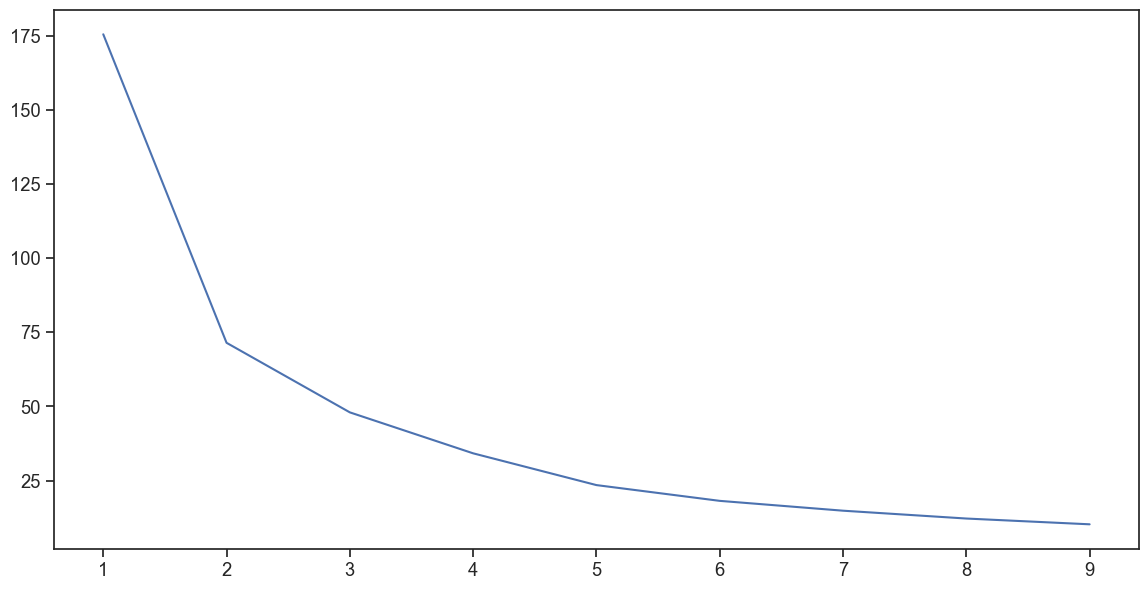

In [465]:
# Plot

plt.figure(figsize=(14,7))
plt.plot(K, inertia)



 Vemos que el punto de inflexión corresponde a 2 Clusters (o 3 Clusters...) ( resultado que concuerda con PCA a 0.90% Varianza)
 
 
 

In [466]:
# Training del modelo con n_clusters = 2 clusters


n_clusters = 2
max_iter = 1000
random_state = 42
algorithm = 'elkan'

#iniciamos Kmeans

Kmeans_2 = KMeans(n_clusters=n_clusters,
                  max_iter = max_iter, 
                  random_state = random_state,
                  algorithm = algorithm)

In [467]:
# Ajustamos a nuestros datos ( obtenemos Clusters :  Y )

Y_k2 = Kmeans_2.fit_predict(pca2_scores)
Y_k2


Kmeans_2.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [468]:
Y_k2.shape

(7050,)

In [469]:
# Asignamos etiquetas a nuestros clusters 


df_pca2 = pd.concat([df_scaled.reset_index(drop = True), pd.DataFrame(pca2_scores)], axis = 1)
df_pca2.columns.values[-2: ] = ['Component 1', 'Component 2']
df_pca2['Cluster'] = Kmeans_2.labels_
df_pca2.tail()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Component 1,Component 2,Cluster
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.0,0.000000,0.0,0.0,-0.044658,-0.017738,0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.0,0.006369,0.0,0.0,-0.065902,-0.010966,0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.0,0.000000,0.0,0.0,-0.070110,-0.011224,0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.0,0.000000,0.0,0.0,0.033061,-0.028592,0
7049,0.003609,0.000000,0.000000,0.003609,0.000000,0.0,0.000000,0.0,0.0,-0.065802,-0.013295,0


In [470]:
# Calculamos las medias por segmentos 

df_pca2_freq = df_pca2.groupby(['Cluster']).mean()
df_pca2_freq.T

Cluster,0,1
num_reactions,0.024830,0.355667
num_comments,0.009328,0.028070
num_shares,0.008896,0.047347
num_likes,0.022540,0.340840
num_loves,0.014235,0.084995
num_wows,0.002157,0.036315
num_hahas,0.003311,0.018797
num_sads,0.004412,0.009459
num_angrys,0.002793,0.014617
Component 1,-0.033989,0.434019


In [471]:
# Asignamos etiquetas a nuestros clusters 


df_pca = pd.concat([df1.reset_index(drop = True), pd.DataFrame(pca2_scores)], axis = 1)
df_pca.columns.values[-2: ] = ['Component 1', 'Component 2']
df_pca['Cluster'] = Kmeans_2.labels_
df1['Cluster']= Kmeans_2.labels_
df1.tail()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
7045,89,0,0,89,0,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0,0
7047,2,0,0,1,1,0,0,0,0,0
7048,351,12,22,349,2,0,0,0,0,0
7049,17,0,0,17,0,0,0,0,0,0


In [472]:
# Calculamos las medias por segmentos 

df_pca_freq = df1.groupby(['Cluster']).mean()
df_pca_freq = df_pca_freq.T

df_pca_freq

Cluster,0,1
num_reactions,116.951514,1675.189453
num_comments,195.786173,589.179688
num_shares,30.46115,162.117188
num_likes,106.165647,1605.357422
num_loves,9.352401,55.841797
num_wows,0.599725,10.095703
num_hahas,0.519884,2.951172
num_sads,0.224992,0.482422
num_angrys,0.086571,0.453125


Calculemos las proporciones respecto al num_reactions para cada Cluster (...cuantos shares/ num_reactions, etc...) . Lo tomaremos como un aproximación a un Ratio Engagement.

In [473]:
i = 0 

for i in df_pca_freq:
    df_pca_freq['Engagement Cluster 0'] = ((df_pca_freq.iloc[:,i-1]/df_pca_freq.iloc[0,0])*100).round(2)
    df_pca_freq['Engagement Cluster 1'] = ((df_pca_freq.iloc[:,i]/df_pca_freq.iloc[0,1])*100).round(2)
i+1

df_pca_freq

Cluster,0,1,Engagement Cluster 0,Engagement Cluster 1
num_reactions,116.951514,1675.189453,100.0,100.0
num_comments,195.786173,589.179688,167.41,35.17
num_shares,30.46115,162.117188,26.05,9.68
num_likes,106.165647,1605.357422,90.78,95.83
num_loves,9.352401,55.841797,8.0,3.33
num_wows,0.599725,10.095703,0.51,0.6
num_hahas,0.519884,2.951172,0.44,0.18
num_sads,0.224992,0.482422,0.19,0.03
num_angrys,0.086571,0.453125,0.07,0.03


Interpretamos diferencias entre Clusters ( Segmentamos):\
Comments : 
    
Muy interesante . 
El Cluster 0 agrupa publicaciones con menos repercusión ( num_reactions bajo (116 vs 1675) pero con más engagement   pues : 
 
num_comments : Quintuplica (X5)   el ratio de num_comments/ num_reactions ( 167% vs 35% )..\
num_shares   : Triplica el ratio de num_shares/ num_reactions ( 167% vs 35% )..\
num_likes    : A la par\
num_loves    : Triplica el ratio de num_loves/ num_reactions ( 8% vs 3.33% )..--3.33% de las reactions generaron un Love--\
num_wows     : A la par\
num_hahas    : Triplica (0.44% vs 0.18%)\
num_sads     : x 7\
num_angrys   : x 2 


In [474]:
# Evaluamos el rendimiento de este clustering K_2 : SSE y Silhouette
#SSE


sse_k2 = Kmeans_2.inertia_
sse_k2

71.43156513373785

In [475]:
#Silhouette


from sklearn.metrics import silhouette_score
silhouette_k2 = silhouette_score(df_pca2,Kmeans_2.labels_)

silhouette_k2




0.8987540637810066

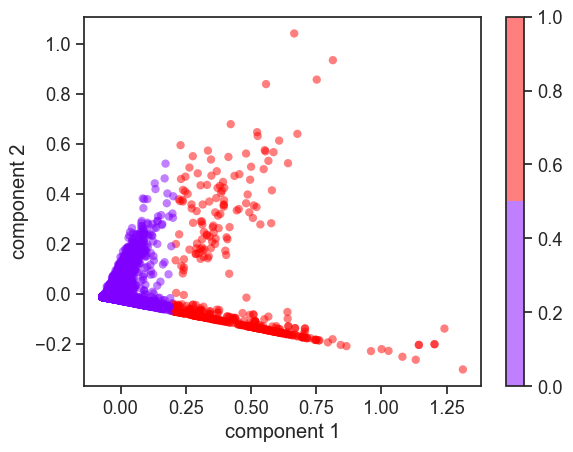

In [476]:
#Scatterplot de los Components 

plt.scatter(df_pca2['Component 1'], df_pca2['Component 2'],
            c=df_pca2['Cluster'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Probamos de todas formas con 4 Clusters

In [477]:
n_clusters = 4
max_iter = 1000
random_state = 42
algorithm = 'elkan'

#iniciamos Kmeans

Kmeans_4 = KMeans(n_clusters=n_clusters,
                  max_iter = max_iter, 
                  random_state = random_state,
                  algorithm = algorithm)

In [478]:
# Ajustamos a nuestros datos

Y_k4 = Kmeans_4.fit_predict(pca4_scores)


# Asignamos etiquetas a nuestros clusters 

pca_df_k4 = pca4_df.copy()
data_k4 = df1.copy()
df_pca4['Cluster'] = Y_k4
data_k4['Cluster'] = Y_k4

Kmeans_4.labels_


array([3, 0, 0, ..., 0, 3, 0])

In [479]:
# Asignamos etiquetas a nuestros clusters  ( 4 )
df2 = df1.copy()

df_pca4 = pd.concat([df2.reset_index(drop = True), pd.DataFrame(pca4_scores)], axis = 1)
df_pca4.columns.values[-4: ] = ['Component 1', 'Component 2','Component 3','Component 4']
df_pca4['Cluster']  = Kmeans_4.labels_
df2['Cluster'] = Kmeans_4.labels_

df2.tail()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
7045,89,0,0,89,0,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0,0
7047,2,0,0,1,1,0,0,0,0,0
7048,351,12,22,349,2,0,0,0,0,3
7049,17,0,0,17,0,0,0,0,0,0


In [480]:
# Calculamos las medias por segmentos 

df2freq = df2.groupby(['Cluster']).mean()
df2freq = df2freq.T
df2fre = df2freq.copy()

In [481]:

for i in df2freq:
    df2fre['Engagement Cluster 0'] = ((df2fre.iloc[:,i-3]/df2fre.iloc[0,0])*100).round(2)
    df2fre['Engagement Cluster 1'] = ((df2fre.iloc[:,i-2]/df2fre.iloc[0,1])*100).round(2)
    df2fre['Engagement Cluster 2'] = ((df2fre.iloc[:,i-1]/df2fre.iloc[0,2])*100).round(2)
    df2fre['Engagement Cluster 3'] = ((df2fre.iloc[:,i]/df2fre.iloc[0,3])*100).round(2)

    
    

df2fre

Cluster,0,1,2,3,Engagement Cluster 0,Engagement Cluster 1,Engagement Cluster 2,Engagement Cluster 3
num_reactions,64.463674,1920.346386,1270.443548,392.491843,100.0,100.0,100.0,100.0
num_comments,24.960693,62.840361,3266.258065,833.476346,38.72,3.27,257.1,212.36
num_shares,5.345566,15.25,685.048387,133.323817,8.29,0.79,53.92,33.97
num_likes,62.16263,1914.572289,984.66129,346.353181,96.43,99.7,77.51,88.24
num_loves,1.71386,3.114458,235.056452,41.073409,2.66,0.16,18.5,10.46
num_wows,0.314829,2.415663,33.943548,1.948613,0.49,0.13,2.67,0.5
num_hahas,0.152198,0.198795,12.596774,2.010604,0.24,0.01,0.99,0.51
num_sads,0.091282,0.039157,2.266129,0.761827,0.14,0.0,0.18,0.19
num_angrys,0.027012,0.006024,1.887097,0.340131,0.04,0.0,0.15,0.09


Con 4 Clusters vemos estas diferencias entre ellos : 
    
 Cluster 0  no tiene mucho interes, solo destaca en cuanto a num_sads..pero nada más . Pocas reacciones, comments...\
 Cluster 1  es el que más reacciones genera, pero realmente destaca en cuanto a Likes genera pero no destaca en ningún otro apartado de " Engagement"\
 Cluster 2  y Cluster 3 estan en otra liga , multiplican los ratios de Engagement que acabamos de comentar para Cluster 0 y Cluster 1\
 Estos resultados confirman quizás que 2 Clusters es mucho más óptimo que 4 .

In [482]:
# Evaluamos el rendimiento de este clustering K_4 ( 4 clusters) y K_2 ( 2 Clusters) : SSE y Silhouette


#SSE K = 4


sse_k4 = Kmeans_4.inertia_
sse_k4

49.02609784313509

Obtenemos mejores resultados Inertia para K = 2  ( 71 % vs 49% )

In [483]:
#SSE K = 2

sse_k2 = Kmeans_2.inertia_
sse_k2

71.43156513373785

In [484]:
#Silhouette K = 4 

from sklearn.metrics import silhouette_score
silhouette_k4 = silhouette_score(df_pca4,Y_k4)

silhouette_k4

0.6533594623942588

In [485]:
#Silhouette K = 2 

from sklearn.metrics import silhouette_score
silhouette_k2 = silhouette_score(df_pca2,Y_k2)

silhouette_k2

0.8987540637810066

 Efectivamente, obtenemos mejores scores con K = 2 



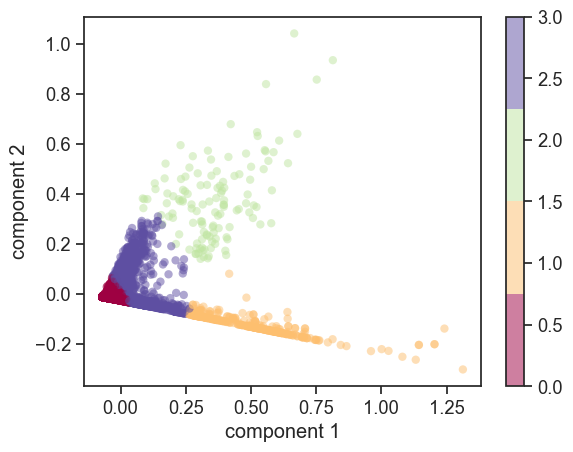

In [486]:
# PLOT de ClUSTERS : 



# 4 Clusters , k = 4 


plt.scatter(x = df_pca4['Component 1'], y = df_pca4['Component 2'], 
            c = df_pca4['Cluster'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 4))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

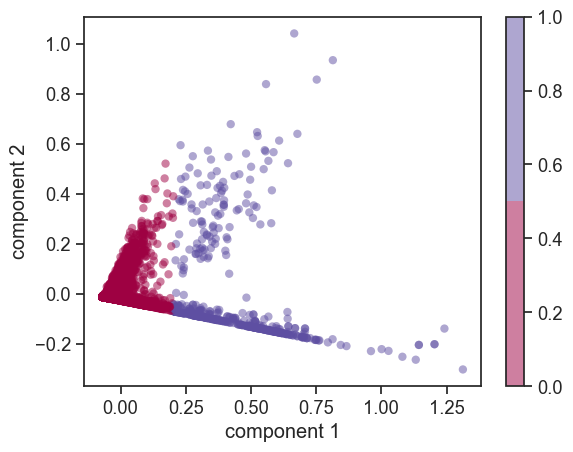

In [487]:
# K = 2 ..Dos Clusters 

plt.scatter(x = df_pca2['Component 1'], y = df_pca2['Component 2'],
            c=df_pca2['Cluster'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

(-0.5, 1.8)

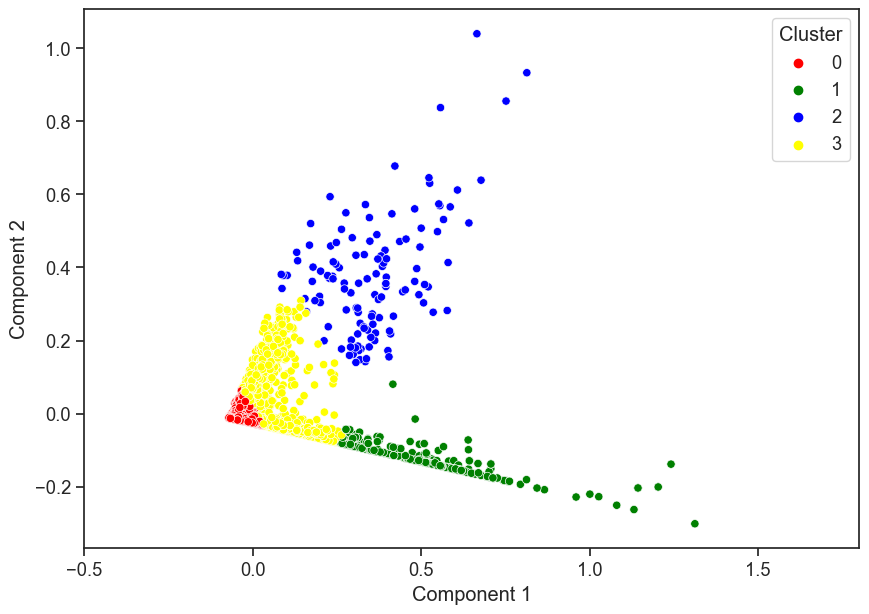

In [488]:
# Plot Principal Component


_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data = df_pca4, x='Component 1', y='Component 2', hue= df_pca4['Cluster'], palette=['red', 'green', 'blue','yellow'])
ax.set_xlim(-0.5, 1.8) 

# Hierarchical clustering

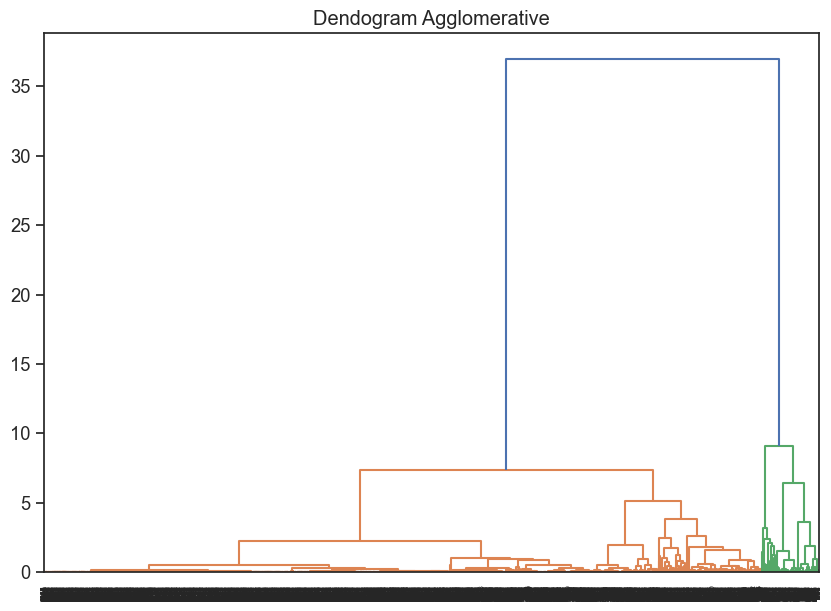

In [445]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
dend_ward = shc.dendrogram(shc.linkage(df_pca2, method='ward'))
plt.title("Dendogram Agglomerative")
plt.axhline(y=2800, color='r', linestyle='--')
plt.show()

Parece que el numero optimo de Clusters es 6.
Con este parametro crearemos nuestro modelo de Hierarchical Clustering

In [489]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')    
cluster.fit_predict(df_pca2)

array([0, 3, 0, ..., 3, 3, 3], dtype=int64)

Y graficamos Silhouette para buscar el nº óptimo de Clusters

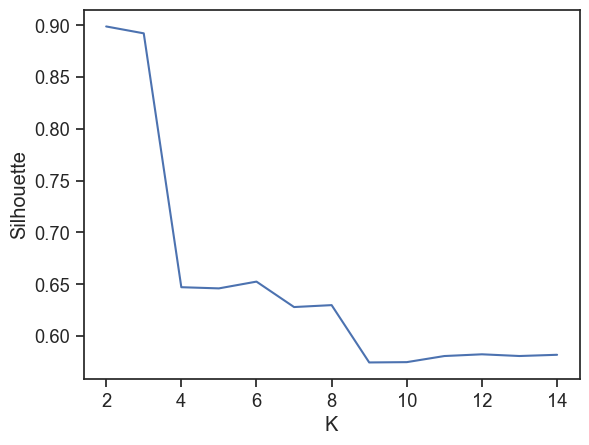

In [490]:
silhouette = []

for k in range(2, 15):
    AG = AgglomerativeClustering(n_clusters=k ,affinity='euclidean', linkage='ward')
    cluster_labels = AG.fit_predict(df_pca2)
    silhouette.append((silhouette_score(df_pca2, cluster_labels)))

#print(silhouette_coefficients_HC)

plt.plot(range(2, 15), silhouette)
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.show()



2 Clusters serían el óptimo si utilizamos Hierarchical clustering.\
Confirma los resultados previos de Kmeans
Aplicamos este nº óptimo de Cluster 

In [491]:
from sklearn.cluster import AgglomerativeClustering

cluster2 = AgglomerativeClustering(n_clusters = 2 , affinity = 'euclidean', linkage = 'ward')    
cluster2.fit_predict(df_pca2)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Con 95% de la varianza retenida en PCA aplicamos Clustering y esta vez obtenemos un máximo en el score de silhouette para 4 Clusters

Concuerda con los resultados de KMEANS

In [492]:
#Silhouette K = 2 

from sklearn.metrics import silhouette_score
silhouette_k2 = silhouette_score(df_pca2,cluster2.fit_predict(df_pca2))

silhouette_k2

0.8987540637810066

Muy buen resultado , muy próximo a 1 . Parece que 2 és el nº óptimo de Clusters.\
Nos quedaremos con la segmentación que explicamos previamente.